# Problem 2.4


First, import necessary pakages and `.mat` data.

In [13]:
import numpy as np
from numpy.linalg import norm, inv
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

J = sio.loadmat('./data/pagerank_adj.mat')['J']

Convert the adjacency matrix `J` to like matrix `A`, and create vector `x` with all entries equal to one.

In [2]:
A = np.matrix(J / J.sum(axis=0, keepdims=True))
N = A.shape[0]
x = np.matrix(np.ones(N).reshape(-1, 1))

## (a)

Verify that wether all the sum of columns are equal to one. 

In [3]:
# Since there are some computation error in division,
# we use np.allclose to get the result.
if np.allclose(A.sum(axis=0), np.ones(N), rtol=1e-06, atol=1e-08):
    print('All the sum of columns are equal to one')

All the sum of columns are equal to one


The property of matrix `A` is called *column-stochastic.* Its all entries are non-negative and the sum of the entries in each column is equal to one. This makes sure that each page has at least one out-going link.

## (b)


Function to implement the pow method which depends on iteration as follow.

In [4]:
### =====================================
### Function for executing power method.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def pow_iter(matrix, x_iter, iteration=10):
    
    x_list, lamb_list, e_list = [], [], []
    
    for k in range(iteration):
        y = np.matmul(A, x_iter) # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = np.matmul(np.matmul(x_iter.conj().T, A), x_iter) # lambda(k + 1)
        
        x_list.append(x_iter)
        lamb_list.append(lamb)
        e_list.append(norm(np.matmul(A, x_iter) - x_iter))
    
    return x_list, lamb_list, e_list

Compute as $k = 10$ and plot the $e(k + 1)$ versus $k$ as follow:

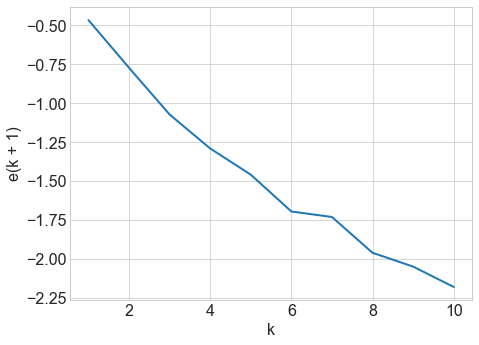

In [22]:
_, _, el = pow_iter(A, x, iteration=10)

# Plot the error results
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7.2, 5.4))
plt.plot(np.arange(len(el)) + 1, np.log(np.asarray(el)), lw=2.)
xlab = plt.xlabel('k')
ylab = plt.ylabel('e(k + 1)')

The above plot is the $\log(e(e + 1))$ versus $k$ with 10 iterations

## (c)

Now we first construct the function of shift-invert power method and make implementation

In [6]:
### =====================================
### Function for shift-invert power method.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def shiftinv_pow(matrix, x_iter, sigma, iteration=10):
    
    x_list, lamb_list, e_list = [], [], []
    I = np.matrix(np.identity(N))
    for k in range(iteration):
        y = np.matmul(inv(A - sigma * I), x_iter) # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = np.matmul(np.matmul(x_iter.conj().T, A), x_iter) # lambda(k + 1)
        
        x_list.append(x_iter)
        lamb_list.append(lamb)
        e_list.append(norm(np.matmul(A, x_iter) - x_iter))
    
    return x_list, lamb_list, e_list

# Compute the error of shift-invert power methods with 10 iterations
_, _, el_shiftinv = shiftinv_pow(A, x, sigma=.99, iteration=10)

Then, construct the function of Rayleigh quotient iteration and make implementation.

In [24]:
### =====================================
### Function for Rayleigh quotient.
### Return the result x(k + 1) 
### lambda_ and error e(k + 1) 
### as lists of k iterations.
### =====================================
def rayleigh_iter(matrix, x_iter, sigma_iter, iteration=10):
    
    # compute rayleigh quotient
    def rayleigh_quot(matr, xx):
        numerator = np.matmul(np.matmul(xx.conj().T, A), xx)
        denominator = np.matmul(xx.conj().T, xx)
        return numerator / denominator
    
    # Computer for iteration
    x_list, lamb_list, e_list = [], [], []
    I = np.matrix(np.identity(N))
    for k in range(iteration):
        
        if k < 2:
            sigma = sigma_iter
        else:            
            sigma =  rayleigh_quot(A, x_iter).item()
        
        y = np.matmul(inv(A - sigma * I), x_iter) # y(k + 1)
        x_iter = y / norm(y, ord=2) # x(k + 1)
        lamb = np.matmul(np.matmul(x_iter.conj().T, A), x_iter) # lambda(k + 1)
        
        x_list.append(x_iter)
        lamb_list.append(lamb)
        e_list.append(norm(np.matmul(A, x_iter) - x_iter))
    
    return x_list, lamb_list, e_list

# Compute the error of Rayleigh quotient methods with 10 iterations
xl_rayleigh, lambl_rayleigh, el_rayleigh = rayleigh_iter(A, x, sigma_iter=.99, iteration=10)

Then, we plot $\log(e(k + 1))$ of three different algorithms.

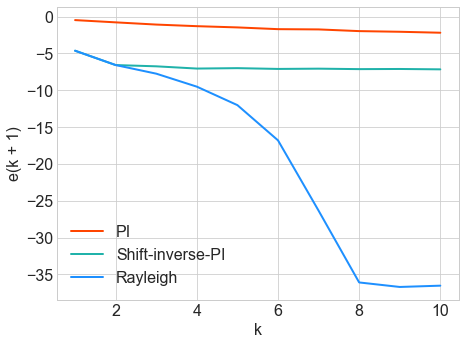

In [25]:
# Plot results
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7.2, 5.4))
plt.plot(np.arange(len(el)) + 1, np.log(np.asarray(el)),
         lw=2., color='#FF4500', label='PI')
plt.plot(np.arange(len(el_shiftinv)) + 1, np.log(np.asarray(el_shiftinv)),
         lw=2., color='#20B2AA', label='Shift-inverse-PI')
plt.plot(np.arange(len(el_rayleigh)) + 1, np.log(np.asarray(el_rayleigh)),
         lw=2., color='#1E90FF', label='Rayleigh')
xlab = plt.xlabel('k')
ylab = plt.ylabel('e(k + 1)')
plgd = plt.legend(loc='best')

As we can see, similar to the results in Example 7.1, the error of the power method decreases slowest with respect to  $k$. The error of the shift-inverse power method decreases more efficiency with respect to  $k$ than the normal power method. By Rayleigh quotient method, the error shrinks rapidly and gets a lower convergence.  

## (d)

Compute all the eigenvalues as folows. We just use the eigenvector computed with the last iteration of Rayleigh quotient method.

In [30]:
lamb_final = lambl_rayleigh[-1].item()

pagescore = xl_rayleigh[-1]
pagescore = pagescore / pagescore.sum()
print('Greatest eigenvalue of the last iteration of Rayleigh: {:.2f}'.format(lamb_final))

Greatest eigenvalue of the last iteration of Rayleigh: 1.00
